In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
lab_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview

lab_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count = lab_data_complete.nunique(axis = 0)["Mouse ID"]



3000/mouse_count
#mouse_count

12.048192771084338

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#lab_data_complete[lab_data_complete.duplicated(['Mouse ID'], keep=False)]

duplicate_id = lab_data_complete[lab_data_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]


# duplicate_id = (duplicate_id )["Mouse ID"]

# duplicate_id_count = (len(duplicate_id))

# (type(duplicate_id_count))

# duplicate_id_count

duplicate_id


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

lab_data_complete[lab_data_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

duplicate_num = lab_data_complete.loc[lab_data_complete["Mouse ID"]== "g989" ]

duplicate_num

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df= lab_data_complete.loc[lab_data_complete["Mouse ID"]!= "g989" ]

cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
cleaned_df.nunique(axis = 0)["Mouse ID"]

248

In [7]:
(len(cleaned_df))



1880

# Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen








avg = cleaned_df.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
median = cleaned_df.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
var = cleaned_df.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
std = cleaned_df.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
sem = cleaned_df.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]




# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe


volume_df = pd.DataFrame({ 
                             "Tumor Volume Mean": avg,
                             "Tumor Volume Median": median,
                             "Tumor Volume Var": var,
                             "Tumor Volume Std": std,
                             "Tumor Volume Sem": sem
    
                         
                        })

volume_df




,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Var,Tumor Volume Std,Tumor Volume Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
agg_df = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var","std","sem"]})


agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

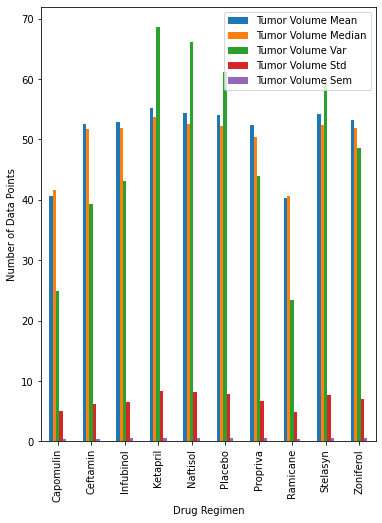

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


data_point = cleaned_df[["Drug Regimen","Timepoint"]]

# Set the index to be "State" so they will be used as labels
data_point = data_point.set_index("Drug Regimen")

# #data_point.head()



# data_point.plot(kind="bar", figsize=(20,3.5))

# # Set a title for the chart

# plt.show()




data_point = volume_df.plot(kind='bar', figsize=(6,8,))


# Set the xlabel and ylabel using class methods
data_point.set_xlabel("Drug Regimen")
data_point.set_ylabel("Number of Data Points")

plt.show()

plt.tight_layout()

<AxesSubplot:xlabel='Drug Regimen'>

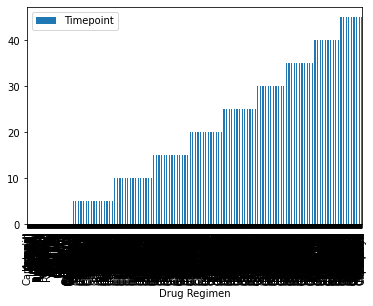

In [14]:
cleaned_df.plot(x="Drug Regimen", y=["Timepoint"], kind="bar")

In [11]:
lab_groupby = cleaned_df.groupby("Drug Regimen")

mean = cleaned_df.mean(axis = "index")["Tumor Volume (mm3)"]
mean = cleaned_df.groupby(['Drug Regimen']).mean()

mean

# mean
#median = cleaned_df.groupby(['Drug Regimen']).median()
#var = cleaned_df.groupby(['Drug Regimen']).var()
#std = cleaned_df.groupby(['Drug Regimen']).std()[]
#std
groupby = cleaned_df.set_index('Drug Regimen')

summary_df = pd.DataFrame({
                             "Tumor Volume mean": mean
    
            
                        })

summary_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

/var/folders/qt/z1139kj16rq91qs03f19sz2c0000gn/T/ipykernel_25185/150212020.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = cleaned_df.mean(axis = "index")["Tumor Volume (mm3)"]


ValueError: If using all scalar values, you must pass an index

In [ ]:
# regession line
x_values = san_diego_housing['AveRooms']
y_values = san_diego_housing['MEDV']

#dotn change
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()